# **Final Project Task 4 - Census Modeling Clustering**

Requirements:

Load Data
- Use the preprocessed dataset from Task 1.

Prepare Features
- Feature Selection:
    - Select relevant numerical and categorical features.
    - Note: K-Means works best with numerical data.
- Data Preprocessing:
    - Be sure you have normalized numerical features (e.g., using MinMaxScaler or StandardScaler) and categorical features encoded properly (e.g., One-Hot Encoding or Ordinal Encoding).
    
Clustering Model Implementation
- Apply K-Means Clustering:
    - Experiment with different values of K (number of clusters).
    - Use the Elbow Method to determine the optimal number of clusters:
    - Use yellowbrick.cluster.KElbowVisualizer to find the best K.
    - Calculate the Silhouette Score to evaluate cluster separation.
- Alternative Clustering Approaches:
    - Experiment with Hierarchical Clustering.
    - Experiment with DBSCAN

Visualize & Interpret Clusters
- Dimensionality Reduction:
    - Apply PCA or t-SNE to reduce dimensions and visualize clusters in 2D.
- Cluster Analysis:
    - Plot the clusters in 2D space.
    - Identify key characteristics of each group.
    - Use only numerical variables to interpret the clusters.
- Example insights:
    - "Older individuals tend to work fewer hours per week."
    - "High-income individuals belong to a specific cluster."

Evaluate Cluster Quality
- Silhouette Score:
    - Compute the Silhouette Score to measure cluster compactness and separation. Higher values indicate better clustering results.
- Cluster Distribution:
    - Analyze how well the data points are distributed across clusters.


Deliverables:
- Notebook code with no errors.
- Visualizations & Analysis:
- Elbow method plot for K selection.
- 2D visualization of clusters.
- Summary of cluster characteristics.
- Cluster evaluation metrics (Silhouette Score).






In [6]:
import pandas as pd

In [7]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7136,25,?,219987,Assoc-acdm,12,Married-civ-spouse,?,Husband,White,Male,0,0,13,United-States,<=50K
11223,50,Private,118058,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,<=50K
16785,44,Private,157217,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
23765,36,Local-gov,255454,Bachelors,13,Never-married,Protective-serv,Not-in-family,Black,Male,0,0,40,United-States,<=50K
19412,43,Local-gov,105896,Some-college,10,Divorced,Protective-serv,Unmarried,White,Female,0,0,40,United-States,<=50K
10378,26,Private,102420,Bachelors,13,Never-married,Sales,Not-in-family,Asian-Pac-Islander,Female,0,0,40,South,<=50K
27974,33,Private,173858,Bachelors,13,Married-civ-spouse,Adm-clerical,Other-relative,Asian-Pac-Islander,Male,0,0,40,India,<=50K
3500,46,Private,357338,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K
30728,65,Private,170939,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,6723,0,40,United-States,<=50K
2082,40,Private,297396,Some-college,10,Separated,Exec-managerial,Unmarried,White,Female,0,0,60,United-States,<=50K


In [8]:
# Example of using KElbowVisualizer

# from yellowbrick.cluster import KElbowVisualizer
# visualizer = KElbowVisualizer(clustering_model, k=(2, 10), metric='distortion', timings=False)
# visualizer.fit(preprocessed_data)
# visualizer.show()
# optimal_k = visualizer.elbow_value_


# Example of using PCA

# from sklearn.decomposition import PCA
# clusters = clustering_model.fit_predict(preprocessed_data)
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(preprocessed_data)
# pca1 = pca_result[:, 0]
# pca2 = pca_result[:, 1]
# # Visualizing Clusters
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=pca1, y=pca2, hue=clusters, palette='tab10', data=data, alpha=0.7)
# plt.title(f'PCA Projection of Clusters (K={num_clusters})')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Cluster')
# plt.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [10]:
#load preprocessed data

train_data = pd.read_csv(r'C:\Users\ASUS\Desktop\ADC 2\MACHINE LEARNING\cursuri_ml\data\task_1\v3_train_preprocessed_robust.csv')

X = train_data.drop('hours-per-week', axis=1)
y = train_data['hours-per-week']


   Testing K=2... Inertia=75504.76, Silhouette=0.2016
   Testing K=3... Inertia=69494.69, Silhouette=0.1433
   Testing K=4... Inertia=65247.46, Silhouette=0.1337
   Testing K=5... Inertia=62166.33, Silhouette=0.1406
   Testing K=6... Inertia=60064.82, Silhouette=0.1104
   Testing K=7... Inertia=58258.56, Silhouette=0.1156
   Testing K=8... Inertia=56695.85, Silhouette=0.1252
   Testing K=9... Inertia=55272.65, Silhouette=0.1178
   Testing K=10... Inertia=54335.92, Silhouette=0.0976


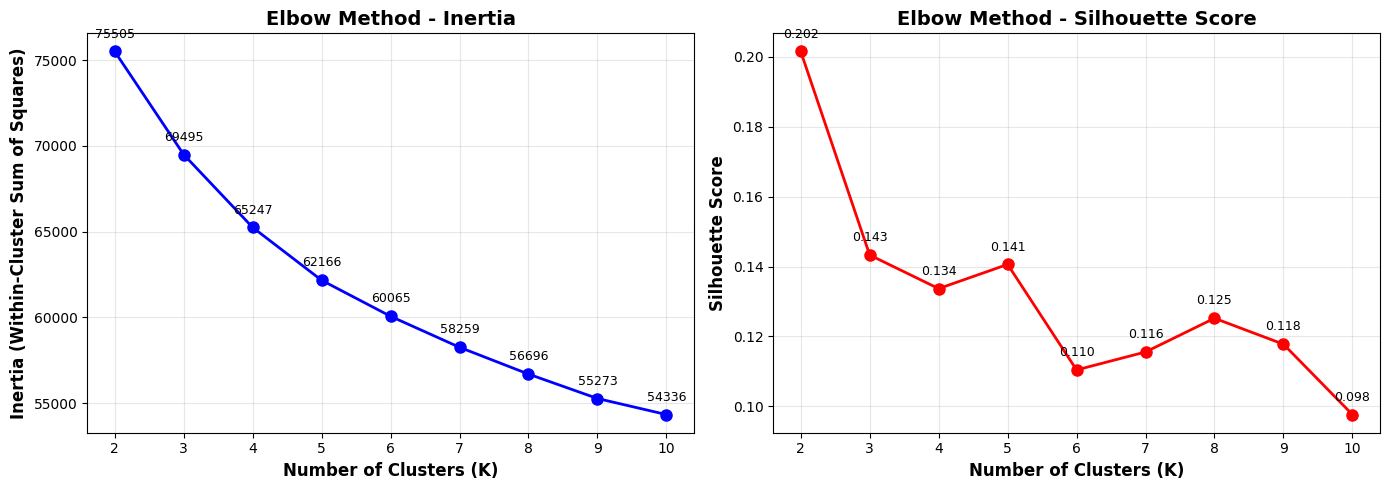

In [11]:
# ELBOW METHOD (nu pot folosi from yellowbrick.cluster import KElbowVisualizer, fac manual)

# Test different K values
K_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in K_range:
    print(f"   Testing K={k}...", end=' ')
    
    # Train K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(X)
    
    # Store inertia 
    inertias.append(kmeans.inertia_)
    
    # Calculate silhouette score
    sil_score = silhouette_score(X, labels)
    silhouette_scores.append(sil_score)
    
    print(f"Inertia={kmeans.inertia_:.2f}, Silhouette={sil_score:.4f}")


#PLOT ELBOW METHOD

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Inertia 
ax1 = axes[0]
ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (K)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontweight='bold', fontsize=12)
ax1.set_title('Elbow Method - Inertia', fontweight='bold', fontsize=14)
ax1.grid(alpha=0.3)
ax1.set_xticks(K_range)

for k, inertia in zip(K_range, inertias):
    ax1.annotate(f'{inertia:.0f}', 
                 xy=(k, inertia), 
                 xytext=(0, 10), 
                 textcoords='offset points',
                 ha='center',
                 fontsize=9)


# Plot 2: Silhouette Score
ax2 = axes[1]
ax2.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (K)', fontweight='bold', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontweight='bold', fontsize=12)
ax2.set_title('Elbow Method - Silhouette Score', fontweight='bold', fontsize=14)
ax2.grid(alpha=0.3)
ax2.set_xticks(K_range)

for k, score in zip(K_range, silhouette_scores):
    ax2.annotate(f'{score:.3f}', 
                 xy=(k, score), 
                 xytext=(0, 10), 
                 textcoords='offset points',
                 ha='center',
                 fontsize=9)

plt.tight_layout()
plt.savefig('elbow_method_plot.png', dpi=300, bbox_inches='tight')
plt.show()

### Conform graficului din dreapta, K2 ofera Silhouette score bun (0.202), dar doar 2 grupuri pentru clasificare ar fi mult prea restrictiv.
### Conform graficului Inertia, elbow este undeva la K5, desi Silhouette este mai mic (0.141)
### Am sa testez ambele K.


### TESTARE REZULTATE K=2

In [12]:
#APPLY K-MEANS WITH OPTIMAL K (2)

optimal_k = 2

kmeans_optimal = KMeans(
    n_clusters=optimal_k,
    random_state=42,
    n_init=10,
    max_iter=300
)

cluster_labels = kmeans_optimal.fit_predict(X)

print(f"K-Means training complete!")
print(f"   Inertia: {kmeans_optimal.inertia_:.2f}")


K-Means training complete!
   Inertia: 75504.76


In [13]:
#SILHOUETTE SCORE EVALUATION


print("SILHOUETTE SCORE EVALUATION")


silhouette_avg = silhouette_score(X, cluster_labels)

print(f"\nSilhouette Score: {silhouette_avg:.4f}")

# Interpretation
if silhouette_avg > 0.5:
    interpretation = "EXCELLENT - Well-separated clusters"
elif silhouette_avg > 0.3:
    interpretation = "GOOD - Reasonable cluster separation"
elif silhouette_avg > 0.2:
    interpretation = "FAIR - Some overlap between clusters"
else:
    interpretation = "POOR - Clusters heavily overlap"

print(f"   Interpretation: {interpretation}")

SILHOUETTE SCORE EVALUATION

Silhouette Score: 0.2016
   Interpretation: FAIR - Some overlap between clusters


In [14]:
#CLUSTER DISTRIBUTION ANALYSIS

print("CLUSTER DISTRIBUTION")


unique_labels, counts = np.unique(cluster_labels, return_counts=True)

print(f"\nCluster sizes:")
for label, count in zip(unique_labels, counts):
    percentage = (count / len(cluster_labels)) * 100
    print(f"   Cluster {label}: {count:5d} samples ({percentage:5.2f}%)")

max_percentage = (counts.max() / len(cluster_labels)) * 100
min_percentage = (counts.min() / len(cluster_labels)) * 100

print(f"\n   Largest cluster: {max_percentage:.1f}%")
print(f"   Smallest cluster: {min_percentage:.1f}%")

if max_percentage > 70:
    print("WARNING: Highly imbalanced clusters")
elif max_percentage > 50:
    print("Moderate imbalance detected")
else:
    print("Clusters are reasonably balanced")

CLUSTER DISTRIBUTION

Cluster sizes:
   Cluster 0: 13361 samples (54.37%)
   Cluster 1: 11213 samples (45.63%)

   Largest cluster: 54.4%
   Smallest cluster: 45.6%
Moderate imbalance detected


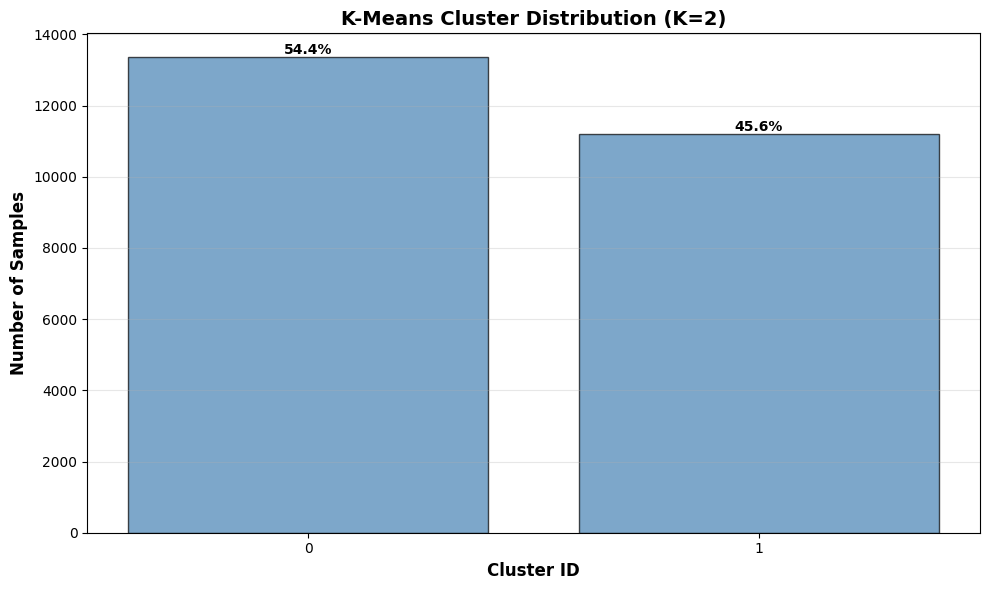

In [15]:
# VISUALIZATION: CLUSTER DISTRIBUTION

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

bars = ax.bar(unique_labels, counts, color='steelblue', alpha=0.7, edgecolor='black')
ax.set_xlabel('Cluster ID', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Samples', fontweight='bold', fontsize=12)
ax.set_title(f'K-Means Cluster Distribution (K={optimal_k})', fontweight='bold', fontsize=14)
ax.set_xticks(unique_labels)
ax.grid(axis='y', alpha=0.3)

for bar, count in zip(bars, counts):
    percentage = (count / len(cluster_labels)) * 100
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{percentage:.1f}%',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('K2_kmeans_cluster_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


### TESTARE REZULTATE K=5

K-Means training complete!
   Inertia: 62166.33
SILHOUETTE SCORE EVALUATION

Silhouette Score: 0.1406
   Interpretation: POOR - Clusters heavily overlap
CLUSTER DISTRIBUTION

Cluster sizes:
   Cluster 0:  2956 samples (12.03%)
   Cluster 1:  7713 samples (31.39%)
   Cluster 2:  5526 samples (22.49%)
   Cluster 3:  4022 samples (16.37%)
   Cluster 4:  4357 samples (17.73%)

   Largest cluster: 31.4%
   Smallest cluster: 12.0%
Clusters are reasonably balanced


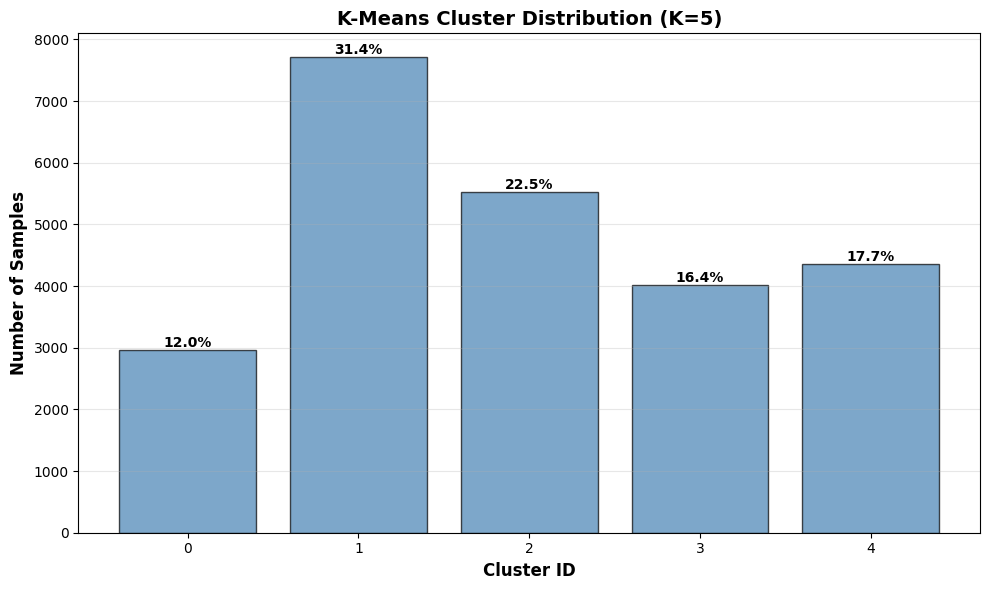

In [16]:
#APPLY K-MEANS WITH OPTIMAL K (5)

optimal_k = 5
kmeans_optimal = KMeans(
    n_clusters=optimal_k,
    random_state=42,
    n_init=10,
    max_iter=300
)

cluster_labels = kmeans_optimal.fit_predict(X)

print(f"K-Means training complete!")
print(f"   Inertia: {kmeans_optimal.inertia_:.2f}")


#SILHOUETTE SCORE EVALUATION


print("SILHOUETTE SCORE EVALUATION")


silhouette_avg = silhouette_score(X, cluster_labels)

print(f"\nSilhouette Score: {silhouette_avg:.4f}")

# Interpretation
if silhouette_avg > 0.5:
    interpretation = "EXCELLENT - Well-separated clusters"
elif silhouette_avg > 0.3:
    interpretation = "GOOD - Reasonable cluster separation"
elif silhouette_avg > 0.2:
    interpretation = "FAIR - Some overlap between clusters"
else:
    interpretation = "POOR - Clusters heavily overlap"

print(f"   Interpretation: {interpretation}")


#CLUSTER DISTRIBUTION ANALYSIS

print("CLUSTER DISTRIBUTION")


unique_labels, counts = np.unique(cluster_labels, return_counts=True)

print(f"\nCluster sizes:")
for label, count in zip(unique_labels, counts):
    percentage = (count / len(cluster_labels)) * 100
    print(f"   Cluster {label}: {count:5d} samples ({percentage:5.2f}%)")

max_percentage = (counts.max() / len(cluster_labels)) * 100
min_percentage = (counts.min() / len(cluster_labels)) * 100

print(f"\n   Largest cluster: {max_percentage:.1f}%")
print(f"   Smallest cluster: {min_percentage:.1f}%")

if max_percentage > 70:
    print("WARNING: Highly imbalanced clusters")
elif max_percentage > 50:
    print("Moderate imbalance detected")
else:
    print("Clusters are reasonably balanced")



# VISUALIZATION: CLUSTER DISTRIBUTION

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

bars = ax.bar(unique_labels, counts, color='steelblue', alpha=0.7, edgecolor='black')
ax.set_xlabel('Cluster ID', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Samples', fontweight='bold', fontsize=12)
ax.set_title(f'K-Means Cluster Distribution (K={optimal_k})', fontweight='bold', fontsize=14)
ax.set_xticks(unique_labels)
ax.grid(axis='y', alpha=0.3)

for bar, count in zip(bars, counts):
    percentage = (count / len(cluster_labels)) * 100
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{percentage:.1f}%',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('K5_kmeans_cluster_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


# ANALIZA COMPARATIVA K=2 vs K=5

### Silhouette score: K2 mult mai bun (0.2016) vs 0.1406 la K5
### Inertia mai mica la K5 (62,166) vs 75,505 la K2
### Cluster balance: 54% / 46% (K2) vs 31% / 22% / 18% / 16% / 12%

### Concluzie: numar optim de clusteri = 2

### De asemenea, trebuie sa tinem cont si de separarea binara inerenta a setului de date pe variabila income= <50k / >50k


### HIERARCHICAL CLUSTERING

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist



 Creating Dendrogram...


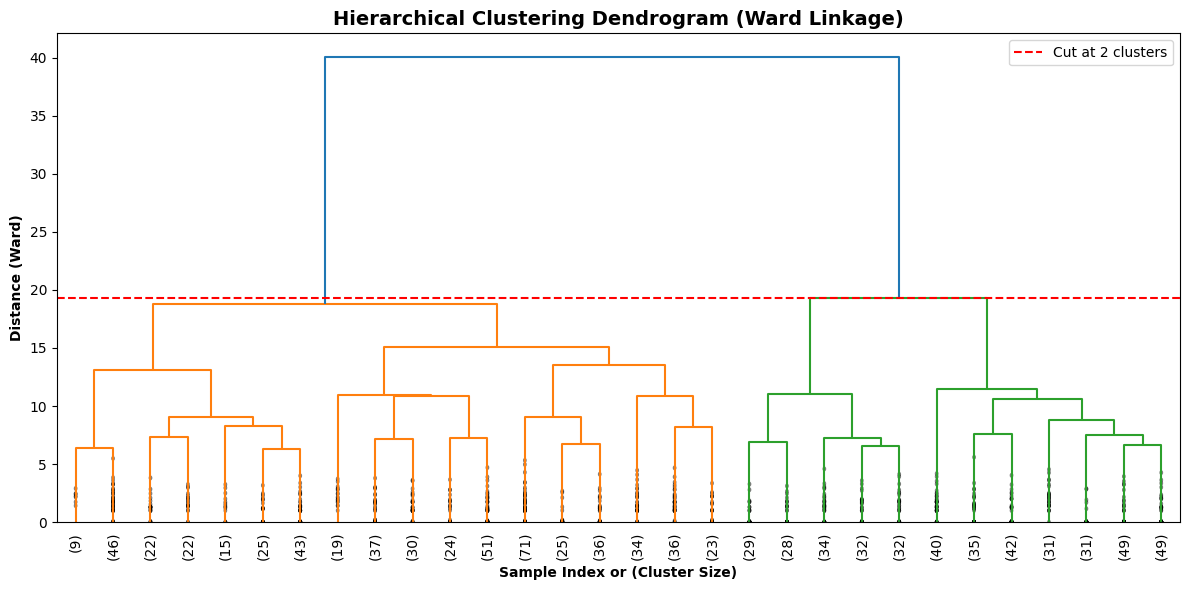

In [18]:
#CREATE DENDROGRAM

print("\n Creating Dendrogram...")

sample_size = min(1000, len(X))  # max 1000 samples
sample_indices = np.random.choice(len(X), sample_size, replace=False)
X_sample = X.iloc[sample_indices]

linkage_matrix = linkage(X_sample, method='ward') 


# Plot Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  
    p=30,  
    leaf_rotation=90,
    leaf_font_size=10,
    show_contracted=True
)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontweight='bold', fontsize=14)
plt.xlabel('Sample Index or (Cluster Size)', fontweight='bold')
plt.ylabel('Distance (Ward)', fontweight='bold')
plt.axhline(y=linkage_matrix[-2, 2], color='r', linestyle='--', label='Cut at 2 clusters')
plt.legend()
plt.tight_layout()
plt.savefig('hierarchical_dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()




In [19]:
#APPLY HIERARCHICAL CLUSTERING (K=2)

print("HIERARCHICAL CLUSTERING WITH K=2")


hierarchical = AgglomerativeClustering(
    n_clusters=2,  
    linkage='ward', 
    metric='euclidean'
)

# Fit and predict
hierarchical_labels = hierarchical.fit_predict(X)

HIERARCHICAL CLUSTERING WITH K=2


In [20]:
#EVALUATE HIERARCHICAL CLUSTERING



print("HIERARCHICAL CLUSTERING EVALUATION")


# Silhouette Score
print("\nCalculating Silhouette Score...")
hierarchical_silhouette = silhouette_score(X, hierarchical_labels)

print(f"\nSilhouette Score: {hierarchical_silhouette:.4f}")

# Interpretation
if hierarchical_silhouette > 0.5:
    hierarchical_interpretation = "EXCELLENT - Well-separated clusters"
elif hierarchical_silhouette > 0.3:
    hierarchical_interpretation = "GOOD - Reasonable cluster separation"
elif hierarchical_silhouette > 0.2:
    hierarchical_interpretation = "FAIR - Some overlap between clusters"
else:
    hierarchical_interpretation = "POOR - Clusters heavily overlap"

print(f"   Interpretation: {hierarchical_interpretation}")


HIERARCHICAL CLUSTERING EVALUATION

Calculating Silhouette Score...

Silhouette Score: 0.1470
   Interpretation: POOR - Clusters heavily overlap


### Pana acum putem spune ca:
### K-Means mult mai bun decat Hierarchical Clustering
### Silhouette score K-means = 0.2016 vs 0.1470 Hierarchical
### Hierarchical - overlapping mult mai mare intre clusteri


In [21]:
# HIERARCHICAL- CLUSTER DISTRIBUTION 

print("HIERARCHICAL - CLUSTER DISTRIBUTION")

unique_hier, counts_hier = np.unique(hierarchical_labels, return_counts=True)

print(f"\nCluster sizes:")
for label, count in zip(unique_hier, counts_hier):
    percentage = (count / len(hierarchical_labels)) * 100
    print(f"   Cluster {label}: {count:5d} samples ({percentage:5.2f}%)")

max_hier_pct = (counts_hier.max() / len(hierarchical_labels)) * 100
min_hier_pct = (counts_hier.min() / len(hierarchical_labels)) * 100

print(f"\n   Largest cluster: {max_hier_pct:.1f}%")
print(f"   Smallest cluster: {min_hier_pct:.1f}%")

if max_hier_pct > 70:
    print("Highly imbalanced clusters")
elif max_hier_pct > 50:
    print(" Moderate imbalance detected")
else:
    print("Clusters are reasonably balanced")



HIERARCHICAL - CLUSTER DISTRIBUTION

Cluster sizes:
   Cluster 0: 18444 samples (75.05%)
   Cluster 1:  6130 samples (24.95%)

   Largest cluster: 75.1%
   Smallest cluster: 24.9%
Highly imbalanced clusters


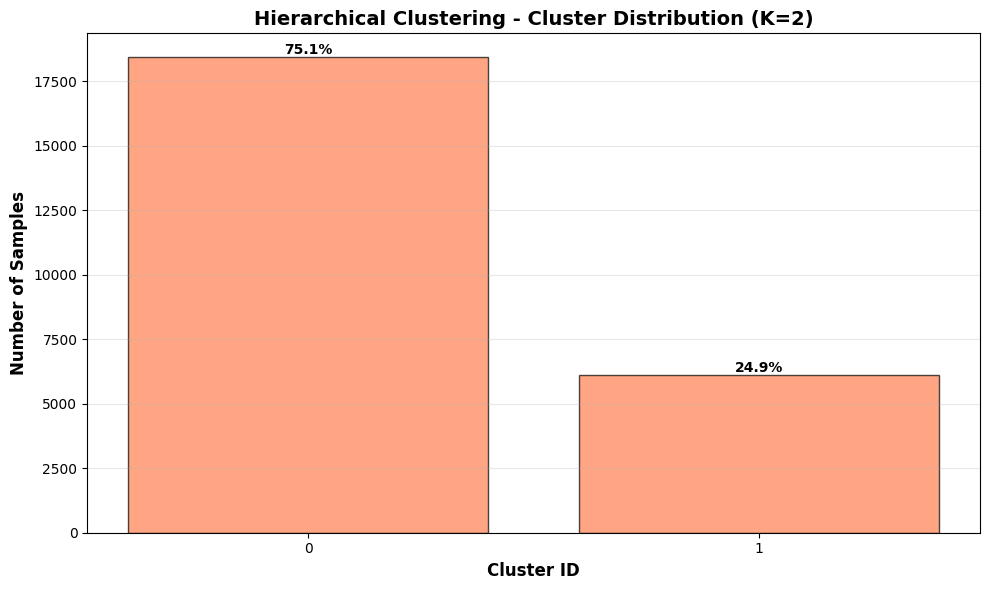

In [22]:

#VISUALIZATION - CLUSTER DISTRIBUTION


fig, ax = plt.subplots(1, 1, figsize=(10, 6))

bars = ax.bar(unique_hier, counts_hier, color='coral', alpha=0.7, edgecolor='black')
ax.set_xlabel('Cluster ID', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Samples', fontweight='bold', fontsize=12)
ax.set_title('Hierarchical Clustering - Cluster Distribution (K=2)', fontweight='bold', fontsize=14)
ax.set_xticks(unique_hier)
ax.grid(axis='y', alpha=0.3)

for bar, count in zip(bars, counts_hier):
    percentage = (count / len(hierarchical_labels)) * 100
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{percentage:.1f}%',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('hierarchical_cluster_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


In [23]:
#COMPARISON HIERARCHICAL WITH K-MEANS

print("COMPARISON: K-MEANS vs HIERARCHICAL")


# Compare cluster assignments
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(cluster_labels, hierarchical_labels)

print(f"\nAdjusted Rand Index (ARI): {ari:.4f}")
print(f"   ARI = 1.0: Identical clustering")
print(f"   ARI = 0.0: Random clustering")
print(f"   ARI < 0.0: Worse than random")

if ari > 0.8:
    print(f" VERY SIMILAR clustering (ARI={ari:.4f})")
elif ari > 0.5:
    print(f" SIMILAR clustering (ARI={ari:.4f})")
elif ari > 0.2:
    print(f"DIFFERENT clustering (ARI={ari:.4f})")
else:
    print(f"VERY DIFFERENT clustering (ARI={ari:.4f})")



COMPARISON: K-MEANS vs HIERARCHICAL

Adjusted Rand Index (ARI): 0.1287
   ARI = 1.0: Identical clustering
   ARI = 0.0: Random clustering
   ARI < 0.0: Worse than random
VERY DIFFERENT clustering (ARI=0.1287)


In [24]:
# Comparison table
comparison_kmeans_hierarchical = pd.DataFrame({
    'Method': ['K-Means', 'Hierarchical'],
    'Silhouette_Score': [0.2016, hierarchical_silhouette],  # K-Means result from earlier
    'Largest_Cluster_Pct': [54.4, max_hier_pct],
    'Smallest_Cluster_Pct': [45.6, min_hier_pct],
    'Interpretation': ['FAIR', hierarchical_interpretation]
})

print("\nPerformance Comparison:")
print(comparison_kmeans_hierarchical.to_string(index=False))


Performance Comparison:
      Method  Silhouette_Score  Largest_Cluster_Pct  Smallest_Cluster_Pct                  Interpretation
     K-Means          0.201600            54.400000             45.600000                            FAIR
Hierarchical          0.147026            75.054936             24.945064 POOR - Clusters heavily overlap


# REZULTATE FIINALE K-MEANS VS HIERARCHICAL

### Silhouette Score: 0.1470 (POOR - clusters heavily overlap)
### Cluster distribution: 75.1% / 24.9% (severely imbalanced)
### ARI vs K-Means: 0.1287 (very different clustering)

# DBSCAN

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [26]:
#optimal eps

k = min(10, X.shape[1])  

print(f" Using k={k} nearest neighbors...")

nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort distances
distances = np.sort(distances[:, k-1], axis=0)



 Using k=10 nearest neighbors...


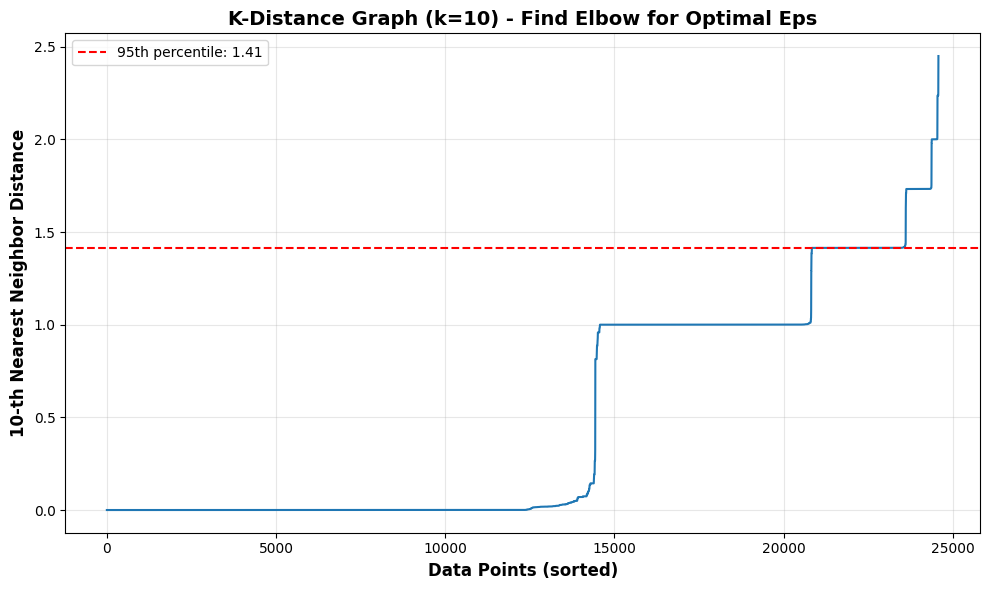

K-distance graph saved to 'dbscan_k_distance_graph.png'


In [27]:
# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points (sorted)', fontweight='bold', fontsize=12)
plt.ylabel(f'{k}-th Nearest Neighbor Distance', fontweight='bold', fontsize=12)
plt.title(f'K-Distance Graph (k={k}) - Find Elbow for Optimal Eps', fontweight='bold', fontsize=14)
plt.grid(alpha=0.3)
plt.axhline(y=np.percentile(distances, 95), color='r', linestyle='--', 
            label=f'95th percentile: {np.percentile(distances, 95):.2f}')
plt.legend()
plt.tight_layout()
plt.savefig('dbscan_k_distance_graph.png', dpi=300, bbox_inches='tight')
plt.show()

print("K-distance graph saved to 'dbscan_k_distance_graph.png'")

In [28]:

# Suggest eps based on percentiles
eps_50 = np.percentile(distances, 50)
eps_75 = np.percentile(distances, 75)
eps_90 = np.percentile(distances, 90)
eps_95 = np.percentile(distances, 95)

print(f"\nDistance percentiles (suggested eps values):")
print(f"   50th percentile: {eps_50:.4f}")
print(f"   75th percentile: {eps_75:.4f}")
print(f"   90th percentile: {eps_90:.4f}")
print(f"   95th percentile: {eps_95:.4f}")


optimal_eps = eps_90

print(f"\nSelected eps: {optimal_eps:.4f} (90th percentile)")


Distance percentiles (suggested eps values):
   50th percentile: 0.0000
   75th percentile: 1.0000
   90th percentile: 1.4142
   95th percentile: 1.4143

Selected eps: 1.4142 (90th percentile)


In [29]:
# TEST DIFFERENT PARAMETER COMBINATIONS


print("TESTING DBSCAN WITH DIFFERENT PARAMETERS")


# Test different combinations
eps_values = [eps_75, eps_90, eps_95]
min_samples_values = [5, 10, 20]

dbscan_results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        print(f"\n   Testing eps={eps:.4f}, min_samples={min_samples}...", end=' ')
        
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
        labels = dbscan.fit_predict(X)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        n_noise_pct = (n_noise / len(labels)) * 100
        

        if n_clusters >= 2:
            mask = labels != -1
            if mask.sum() > 0:
                silhouette = silhouette_score(X[mask], labels[mask])
            else:
                silhouette = -1.0
        else:
            silhouette = -1.0
        
        print(f"Clusters={n_clusters}, Noise={n_noise_pct:.1f}%, Silhouette={silhouette:.4f}")
        
        dbscan_results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'n_noise_pct': n_noise_pct,
            'silhouette': silhouette
        })

# Convert to DataFrame
dbscan_results_df = pd.DataFrame(dbscan_results)

print("\nAll DBSCAN Results:")
print(dbscan_results_df.to_string(index=False))



TESTING DBSCAN WITH DIFFERENT PARAMETERS

   Testing eps=1.0000, min_samples=5... Clusters=29, Noise=8.3%, Silhouette=-0.1792

   Testing eps=1.0000, min_samples=10... Clusters=12, Noise=11.1%, Silhouette=-0.1059

   Testing eps=1.0000, min_samples=20... Clusters=7, Noise=16.0%, Silhouette=-0.0422

   Testing eps=1.4142, min_samples=5... Clusters=1, Noise=1.4%, Silhouette=-1.0000

   Testing eps=1.4142, min_samples=10... Clusters=1, Noise=1.8%, Silhouette=-1.0000

   Testing eps=1.4142, min_samples=20... Clusters=1, Noise=2.4%, Silhouette=-1.0000

   Testing eps=1.4143, min_samples=5... Clusters=1, Noise=1.0%, Silhouette=-1.0000

   Testing eps=1.4143, min_samples=10... Clusters=1, Noise=1.3%, Silhouette=-1.0000

   Testing eps=1.4143, min_samples=20... Clusters=1, Noise=1.9%, Silhouette=-1.0000

All DBSCAN Results:
     eps  min_samples  n_clusters  n_noise  n_noise_pct  silhouette
1.000000            5          29     2048     8.334012   -0.179202
1.000000           10          12   

In [30]:
#SELECT BEST PARAMETERS


print("BEST DBSCAN PARAMETERS")


valid_results = dbscan_results_df[dbscan_results_df['n_clusters'] >= 2]

if len(valid_results) > 0:
    # Sort by Silhouette (descending) and noise percentage (ascending)
    valid_results = valid_results.sort_values(['silhouette', 'n_noise_pct'], 
                                              ascending=[False, True])
    
    best_params = valid_results.iloc[0]
    best_eps = best_params['eps']
    best_min_samples = int(best_params['min_samples'])
    
    print(f"\nBest parameters found:")
    print(f"   eps: {best_eps:.4f}")
    print(f"   min_samples: {best_min_samples}")
    print(f"   n_clusters: {int(best_params['n_clusters'])}")
    print(f"   noise: {best_params['n_noise_pct']:.1f}%")
    print(f"   Silhouette: {best_params['silhouette']:.4f}")
else:
    print("\nWARNING: No valid clustering found (all results have <2 clusters)")
    best_eps = optimal_eps
    best_min_samples = 10


BEST DBSCAN PARAMETERS

Best parameters found:
   eps: 1.0000
   min_samples: 20
   n_clusters: 7
   noise: 16.0%
   Silhouette: -0.0422


In [31]:
#DBSCAN WITH BEST PARAMETERS


print("DBSCAN CLUSTERING")

print(f"   eps={best_eps:.4f}, min_samples={best_min_samples}")

dbscan_final = DBSCAN(eps=best_eps, min_samples=best_min_samples, n_jobs=-1)
dbscan_labels = dbscan_final.fit_predict(X)


DBSCAN CLUSTERING
   eps=1.0000, min_samples=20


In [32]:
#DBSCAN EVALUATION


print("DBSCAN EVALUATION")


# Cluster statistics
n_clusters_final = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_final = list(dbscan_labels).count(-1)
n_noise_pct_final = (n_noise_final / len(dbscan_labels)) * 100

print(f"\nClustering Results:")
print(f"   Number of clusters: {n_clusters_final}")
print(f"   Noise points: {n_noise_final} ({n_noise_pct_final:.2f}%)")
print(f"   Clustered points: {len(dbscan_labels) - n_noise_final} ({100-n_noise_pct_final:.2f}%)")

# Silhouette Score
if n_clusters_final >= 2:
    mask_final = dbscan_labels != -1
    if mask_final.sum() > 0:
        dbscan_silhouette = silhouette_score(X[mask_final], dbscan_labels[mask_final])
        
        print(f"\nSilhouette Score: {dbscan_silhouette:.4f}")
        
        if dbscan_silhouette > 0.5:
            dbscan_interpretation = "EXCELLENT - Well-separated clusters"
        elif dbscan_silhouette > 0.3:
            dbscan_interpretation = "GOOD - Reasonable cluster separation"
        elif dbscan_silhouette > 0.2:
            dbscan_interpretation = "FAIR - Some overlap between clusters"
        else:
            dbscan_interpretation = "POOR - Clusters heavily overlap"
        
        print(f"   Interpretation: {dbscan_interpretation}")
    else:
        dbscan_silhouette = -1.0
        dbscan_interpretation = "N/A - All points are noise"
        print(f"\nCannot calculate Silhouette: All points classified as noise")
else:
    dbscan_silhouette = -1.0
    dbscan_interpretation = "N/A - Less than 2 clusters"
    print(f"\nCannot calculate Silhouette: Only {n_clusters_final} cluster(s) found")


DBSCAN EVALUATION

Clustering Results:
   Number of clusters: 7
   Noise points: 3924 (15.97%)
   Clustered points: 20650 (84.03%)

Silhouette Score: -0.0422
   Interpretation: POOR - Clusters heavily overlap


### Am aplicat DBSCAN  cu parametri optimizati (eps=90th percentile, min_samples testati prin grid search)
### -> rezultate foarte slabe:
### - Silhouette Score: -0.042 
### - a gasit 7 clustere
### - noise: 15.97%

### Cel mai bun ramane K-MEANS

In [33]:
kmeans_k2 = KMeans(n_clusters=2, random_state=42, n_init=10, max_iter=300)
labels_k2 = kmeans_k2.fit_predict(X)

# CREATE DATAFRAME PENTRU INTERPRETARE  
interpretation_df = pd.DataFrame({
    'age_group': X.iloc[:, X.columns.get_loc('age_group')],
    'education_level': X.iloc[:, X.columns.get_loc('education_level')],
    'net_capital': X.iloc[:, X.columns.get_loc('net_capital')],
    'hours-per-week': train_data['hours-per-week'],  # Target
    'Cluster': labels_k2  # ← K=2 labels
})

print(f"\nCreated fresh interpretation DataFrame:")
print(f"   Shape: {interpretation_df.shape}")
print(f"   Columns: {list(interpretation_df.columns)}")


Created fresh interpretation DataFrame:
   Shape: (24574, 5)
   Columns: ['age_group', 'education_level', 'net_capital', 'hours-per-week', 'Cluster']


DIMENSIONALITY REDUCTION - PCA
   PC1: 31.94% variance
   PC2: 10.45% variance
   Total: 42.39% variance


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


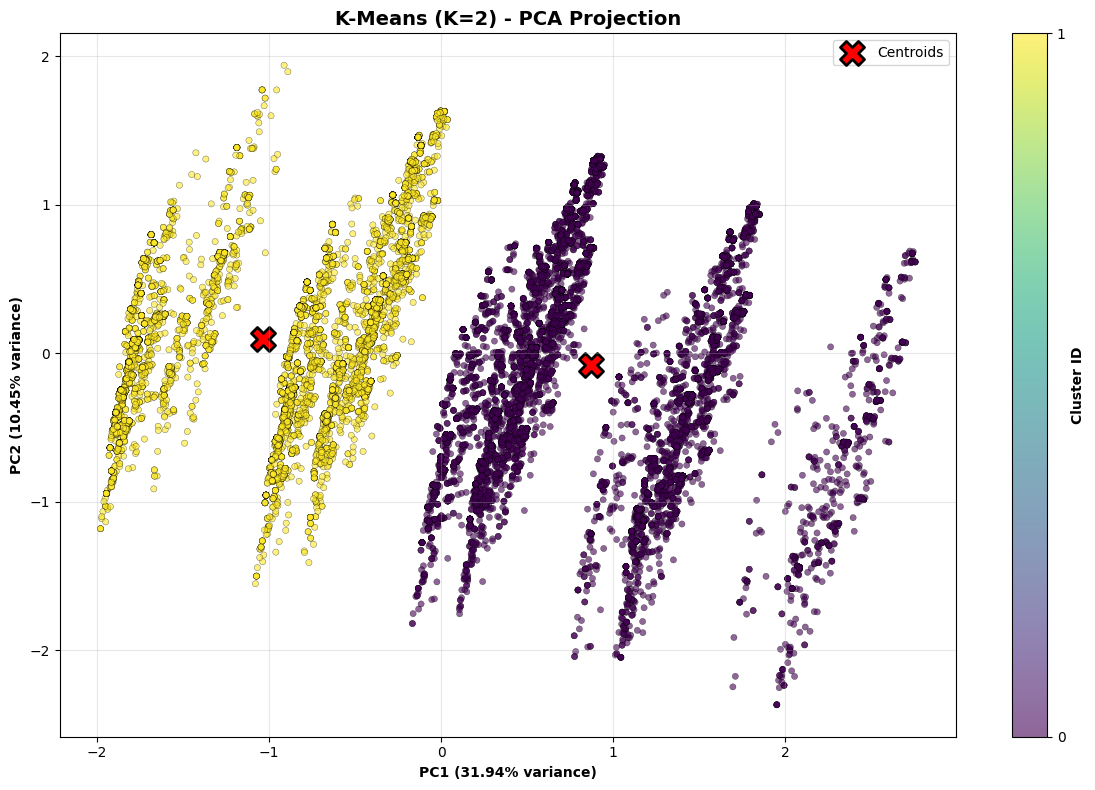

In [34]:
#DIMENSIONALITY REDUCTION - PCA + VIZUALIZARE

from sklearn.decomposition import PCA

print("DIMENSIONALITY REDUCTION - PCA")

from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

variance_explained = pca.explained_variance_ratio_
print(f"   PC1: {variance_explained[0]*100:.2f}% variance")
print(f"   PC2: {variance_explained[1]*100:.2f}% variance")
print(f"   Total: {(variance_explained.sum())*100:.2f}% variance")

# Create PCA DataFrame
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': labels_k2  # ← K=2 labels
})

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

scatter = ax.scatter(
    pca_df['PC1'], 
    pca_df['PC2'], 
    c=pca_df['Cluster'],
    cmap='viridis',
    alpha=0.6,
    s=20,
    edgecolors='black',
    linewidth=0.3
)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cluster ID', fontweight='bold')
cbar.set_ticks([0, 1])

# Centroids
centroids_pca = pca.transform(kmeans_k2.cluster_centers_)
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
           c='red', marker='X', s=300, edgecolors='black', linewidth=2, label='Centroids')

ax.set_xlabel(f'PC1 ({variance_explained[0]*100:.2f}% variance)', fontweight='bold')
ax.set_ylabel(f'PC2 ({variance_explained[1]*100:.2f}% variance)', fontweight='bold')
ax.set_title('K-Means (K=2) - PCA Projection', fontweight='bold', fontsize=14)
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('kmeans_k2_pca_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
train_data.columns

Index(['net_capital', 'age_group', 'education_level', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'sex_Male', 'native-country_Cuba',
       'native-country_E

In [36]:
#CLUSTER ANALYSIS

print("CLUSTER INTERPRETATION - K-MEANS (K=2)")

print("NUMERICAL variables only: age_group, education_level, net_capital, hours-per-week")

# Add cluster labels to train data 
if 'Cluster_KMeans' not in train_data.columns:
    train_data['Cluster_KMeans'] = cluster_labels

numerical_vars = ['age_group', 'education_level', 'net_capital', 'hours-per-week']

# Compute statistics for each cluster
cluster_stats = []

for cluster_id in [0, 1]:
    cluster_data = train_data[train_data['Cluster_KMeans'] == cluster_id]
    
    stats = {
        'Cluster': cluster_id,
        'Size': len(cluster_data),
        'Size_Pct': (len(cluster_data) / len(train_data)) * 100
    }
    
    # Add mean for each numerical variable
    for var in numerical_vars:
        stats[f'{var}_mean'] = cluster_data[var].mean()
        stats[f'{var}_std'] = cluster_data[var].std()
    
    cluster_stats.append(stats)


cluster_stats_df = pd.DataFrame(cluster_stats)


print("CLUSTER STATISTICS")


for cluster_id in [0, 1]:
    cluster_row = cluster_stats_df[cluster_stats_df['Cluster'] == cluster_id].iloc[0]
    
    print(f"\n CLUSTER {cluster_id}:")
    print(f"   Size: {int(cluster_row['Size'])} samples ({cluster_row['Size_Pct']:.2f}%)")
    print(f" - age_group:       {cluster_row['age_group_mean']:.3f} ± {cluster_row['age_group_std']:.3f}")
    print(f" - education_level: {cluster_row['education_level_mean']:.3f} ± {cluster_row['education_level_std']:.3f}")
    print(f" - net_capital:     {cluster_row['net_capital_mean']:.3f} ± {cluster_row['net_capital_std']:.3f}")
    print(f" - hours-per-week:  {cluster_row['hours-per-week_mean']:.2f} ± {cluster_row['hours-per-week_std']:.2f}")


CLUSTER INTERPRETATION - K-MEANS (K=2)
NUMERICAL variables only: age_group, education_level, net_capital, hours-per-week
CLUSTER STATISTICS

 CLUSTER 0:
   Size: 2956 samples (12.03%)
 - age_group:       3.227 ± 0.419
 - education_level: 0.952 ± 0.538
 - net_capital:     0.055 ± 0.075
 - hours-per-week:  39.50 ± 13.75

 CLUSTER 1:
   Size: 7713 samples (31.39%)
 - age_group:       0.421 ± 0.494
 - education_level: 1.127 ± 0.492
 - net_capital:     0.044 ± 0.030
 - hours-per-week:  36.96 ± 12.16


In [37]:
#CLUSTER ANALYSIS

numerical_vars = ['age_group', 'education_level', 'net_capital', 'hours-per-week']

for cluster_id in [0, 1]:
    cluster_data = interpretation_df[interpretation_df['Cluster'] == cluster_id]
    
    size = len(cluster_data)
    size_pct = (size / len(interpretation_df)) * 100
    
    print(f"\n CLUSTER {cluster_id}:")
    print(f" Size: {size} samples ({size_pct:.2f}%)")
    print(f"Characteristics (mean - std):")
    
    for var in numerical_vars:
        mean = cluster_data[var].mean()
        std = cluster_data[var].std()
        print(f"{var:20s}: {mean:6.3f} - {std:.3f}")

# COMPARISON


print("CLUSTER COMPARISON & INSIGHTS")


cluster_0_data = interpretation_df[interpretation_df['Cluster'] == 0]
cluster_1_data = interpretation_df[interpretation_df['Cluster'] == 1]

print("Differences (Cluster 1 - Cluster 0):")

for var in numerical_vars:
    mean_0 = cluster_0_data[var].mean()
    mean_1 = cluster_1_data[var].mean()
    diff = mean_1 - mean_0
    diff_pct = (diff / mean_0) * 100 if mean_0 != 0 else 0
    
    direction = "HIGHER" if diff > 0 else "LOWER"
    print(f" {var:20s}: {direction:6s} by {abs(diff):6.3f} ({abs(diff_pct):5.1f}%)")


print(f"   Total samples analyzed: {len(interpretation_df)}")
print(f"   Cluster 0: {len(cluster_0_data)} ({len(cluster_0_data)/len(interpretation_df)*100:.1f}%)")
print(f"   Cluster 1: {len(cluster_1_data)} ({len(cluster_1_data)/len(interpretation_df)*100:.1f}%)")



 CLUSTER 0:
 Size: 13361 samples (54.37%)
Characteristics (mean - std):
age_group           :  2.394 - 0.582
education_level     :  1.208 - 0.575
net_capital         :  0.056 - 0.089
hours-per-week      : 42.380 - 11.654

 CLUSTER 1:
 Size: 11213 samples (45.63%)
Characteristics (mean - std):
age_group           :  0.589 - 0.492
education_level     :  1.141 - 0.507
net_capital         :  0.045 - 0.042
hours-per-week      : 39.248 - 12.156
CLUSTER COMPARISON & INSIGHTS
Differences (Cluster 1 - Cluster 0):
 age_group           : LOWER  by  1.805 ( 75.4%)
 education_level     : LOWER  by  0.067 (  5.5%)
 net_capital         : LOWER  by  0.011 ( 19.4%)
 hours-per-week      : LOWER  by  3.132 (  7.4%)
   Total samples analyzed: 24574
   Cluster 0: 13361 (54.4%)
   Cluster 1: 11213 (45.6%)


# CLUSTER INSIGHTS

### CLUSTER 0 - Senior Full-Time Workers
### - 54%, 13,361 samples 
### - varsta: 2.39 (50-65 ani)
### - ore lucrate/saptamana: 42.4 (peste standard de 40h)
### - education: 1.21 (medium-high)
### - net-capital: 0.056 

### CLUSTER 1 - Young Standard Workers
### - 46%, 11,213 samples
### - varsta: 0.59 (20-35 ani)
### - ore lucrate/saptamana: 39.2 (sub standard)
### - education: 1.14 (medium)
### - net-capital: 0.045

# Observatii cheie:
### - cele 2 clustere sunt separate in principiu pe baza varstei (75% diferenta)
### - pe masura ce avanseaza in varsta, persoanele tind sa lucreze mai mult (diferenta de cca. 3 ore)
### - nu se face diferentiere clara pe variabila education (1.21 vs 1.14 -> mai putin de 0.6% diferenta)
### - vizualizarea 2D PCA explica 42.39% din variatie (PC1: 31.94% variance; PC2: 10.45% variance). PC2 capteaza variatia inter-cluster, dar nu contribuie la clusterizare.
### - probabil rezultatele acestea sunt influentate si de structura binara setului de date, impartit dupa variabila income




In [38]:
# Final comparison table
final_comparison = pd.DataFrame({
    'Method': ['K-Means (K=2)', 'K-Means (K=5)', 'Hierarchical', 'DBSCAN'],
    'Silhouette_Score': [0.2016, 0.1406, 0.1470, -0.0422],
    'Largest_Cluster_%': [54.4, 31.4, 75.1, 'N/A'],
    'Smallest_Cluster_%': [45.6, 12.0, 24.9, 'N/A'],
    'Balance': ['Excellent', 'Poor', 'Severe Imbalance', 'Fragmented'],
})


print("FINAL CLUSTERING QUALITY COMPARISON")

print(final_comparison.to_string(index=False))


final_comparison.to_csv('final_clustering_comparison.csv', index=False)


FINAL CLUSTERING QUALITY COMPARISON
       Method  Silhouette_Score Largest_Cluster_% Smallest_Cluster_%          Balance
K-Means (K=2)            0.2016              54.4               45.6        Excellent
K-Means (K=5)            0.1406              31.4               12.0             Poor
 Hierarchical            0.1470              75.1               24.9 Severe Imbalance
       DBSCAN           -0.0422               N/A                N/A       Fragmented


# CONCLUZII FINALE

### K-Means cu K=2 a oferit cea mai buna varianta de clusterizare, cu Silhouette score de 0.216. Distributia balansata aproximativ egal (54% - 46%), nu a existat un cluster dominant. Overfitting minimal cu R2 Gap 0.017
### Am incercat si variante alternative: Hierarchical Clustering si DBSCAN, insa am esuat. In cazul Hierarchical distributia a fost extrem de imbalansata (75-25), overlap mare, Silhouette score 0.1406. Experimentul cu DBSCAN a esuat total, Silhouette score negativ (-0.422), ceea ce inseamna ca clusterizarea s-a facut randomizat. 
### K-means cu K=5 l-am facut strict pentru comparatie cu K=2, pentru ca mi s-a parut o impartire extrem de simplista. In final, K=2 a avut rezultatele cele mai bune, comparativ cu celelalte modele testate. 